## Crime Reports: Machine Learning Classification Applied to Crime in Los Angeles

#### Contributors: Bryan Cortes, Alexander Golubow, Genna Quach
#### Professor: Kanika Sood


 Machine learning allows for a system to learn and improve
as time goes by when trained with an increasing amount of
patterns and data. This would be a useful tool in creating a
system that would help society be aware of the crime rate.
There are numerous crimes that can occur any day at any time;
making it near impossible to prevent every single crime from
occurring. Rather than strive for the impossible, the algorithm
we are suggesting will be able to pinpoint the possibility of
a crime being violent or not, allowing for citizens to be more
aware of the risks. The City of Los Angeles has a violent
crime rate of 445 crimes per 100,000 people, higher than the
national rate in 2020.  We will analyze the data using multiple models such as KNN to examine the data to view the outcome if based on given information such as time,location (latitude & longtitude), age, ect. to determine if the given crime report was a violent crime or not. 


In [18]:
# import necessary libraries and packages
import pandas                  as pd
import numpy                   as np
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.naive_bayes       import GaussianNB
from sklearn.linear_model      import LogisticRegression
from sklearn.model_selection   import train_test_split
from sklearn.metrics           import accuracy_score
from sklearn.pipeline          import make_pipeline
from sklearn.pipeline          import Pipeline
from sklearn.preprocessing     import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import seaborn                 as sns
import matplotlib.pyplot       as plt
from sklearn.metrics           import PrecisionRecallDisplay
from sklearn.metrics           import confusion_matrix
from sklearn.metrics           import classification_report
from sklearn.metrics           import precision_score
from sklearn.metrics           import accuracy_score
from sklearn.metrics           import recall_score
from sklearn.metrics           import f1_score
from sklearn.metrics           import roc_curve
from sklearn.metrics           import auc
import pickle
from imblearn.over_sampling    import SMOTE
from sklearn                   import tree
 
print("imported the libraries")

imported the libraries


In [17]:
# loading the data
DATA = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

print("Was able to import the data file")

Was able to import the data file


In [3]:
DATA.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [4]:
def absHighPass(DATA, absThresh=0.5):
    passed = set()
    for (r,c) in combinations(DATA.columns, 2):
        if (abs(DATA.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return DATA.loc[passed,passed]

Looking at the data and seeing the amount of NA/null within each column

In [5]:
row_count = DATA.shape[0]
for col in DATA.columns:
    if DATA[col].isnull().sum():
        print("Col: " + str(col) + " and the count: " + str(DATA[col].isnull().sum()))
        print("Ratio of null/NA of that column: " + str(round(DATA[col].isnull().sum() / row_count, 3)))
        print("=========================================")

Col: Mocodes and the count: 94375
Ratio of null/NA of that column: 0.137
Col: Vict Sex and the count: 89921
Ratio of null/NA of that column: 0.131
Col: Vict Descent and the count: 89926
Ratio of null/NA of that column: 0.131
Col: Premis Cd and the count: 8
Ratio of null/NA of that column: 0.0
Col: Premis Desc and the count: 361
Ratio of null/NA of that column: 0.001
Col: Weapon Used Cd and the count: 447842
Ratio of null/NA of that column: 0.652
Col: Weapon Desc and the count: 447842
Ratio of null/NA of that column: 0.652
Col: Crm Cd 1 and the count: 9
Ratio of null/NA of that column: 0.0
Col: Crm Cd 2 and the count: 635159
Ratio of null/NA of that column: 0.925
Col: Crm Cd 3 and the count: 684711
Ratio of null/NA of that column: 0.997
Col: Crm Cd 4 and the count: 686384
Ratio of null/NA of that column: 1.0
Col: Cross Street and the count: 574741
Ratio of null/NA of that column: 0.837


In [6]:
# normalizes from 0-1 data. Normalizes data from the list of columns that were given
def normalize(DATA, columns):
    for column in columns:
        if column in DATA.columns:
            DATA[column] = (DATA[column] - DATA[column].min()) / (DATA[column].max() - DATA[column].min())
        else:
            print("the column: '" + str(column) + "' does not exist...")

    return DATA

In [7]:
# pre processing of data
def preProcess(DATA):
    violent = {'110':'violent', '113':'violent', '121':'violent', '122':'violent', '815':'violent', 
               '820':'violent', '821':'violent', '230':'violent', '231':'violent', '235':'violent',
               '236':'violent', '250':'violent', '761':'violent', '926':'violent'}
    
    # creating our target variable
    DATA['Violent/Non-Violent'] = pd.Series(dtype='int')
    
    # delete if the crm Cd is not there
    DATA.dropna(subset=['Crm Cd'], inplace=True)
    
    dropCols = [
        "DR_NO",
        "DATE OCC",
        "AREA NAME",
        "Crm Cd Desc",
        "Vict Descent",
        'Premis Desc',
        "Weapon Used Cd",
        "Weapon Desc",
        "Status",
        "Status Desc",
        "LOCATION",
        "Mocodes",
        "Cross Street",
        "Date Rptd",
        'Crm Cd 1',
        'Crm Cd 2',
        'Crm Cd 3',
        'Crm Cd 4',
        "Rpt Dist No",
        "Part 1-2"
    ]
    
    DATA.drop(dropCols, axis=1, inplace=True)
    
    
    # change 10 to len(DATA) i think, just have it as 10 for it to be quick
    # If the crime is a violent crime, list it as 1 otherwise 0.
    for i in range(len(DATA)):
        val = str(DATA.loc[i,'Crm Cd'])
#         print("|" + val + '|')
        if val in violent:            
            DATA.loc[i, 'Violent/Non-Violent'] = 1
        else:
            DATA.loc[i, 'Violent/Non-Violent'] = 0
            
        # Change the letter M and F to a number
        x = str(DATA.loc[i,'Vict Sex'])
        if x == 'M':
            DATA.loc[i,'Vict Sex'] = 0
        elif x == 'F':
            DATA.loc[i,'Vict Sex'] = 1
        else:
            DATA.loc[i, 'Vict Sex'] = 'X'
    index_delete = DATA[ (DATA['Vict Sex'] == 'X') | ( (DATA['Vict Sex'].isna())) | ( (DATA['Vict Age'] == '0') )].index
    DATA.drop(index_delete, inplace=True)
    DATA.drop(["Crm Cd"], axis=1, inplace=True)
    DATA = normalize(DATA, ['TIME OCC', 'LAT', 'LON'])
    return DATA

In [8]:
dp = preProcess(DATA)

In [9]:
dp.head(10)

,TIME OCC,AREA,Vict Age,Vict Sex,Premis Cd,LAT,LON,Violent/Non-Violent
0,0.945293,3,36,1,501.0,0.990674,0.003116,0.0
1,0.139525,1,25,0,102.0,0.991600,0.003481,0.0
3,0.733249,15,76,1,502.0,0.995171,0.002239,0.0
5,0.012299,1,25,1,735.0,0.991580,0.003490,1.0
6,0.557252,1,23,0,404.0,0.991670,0.003409,0.0
8,0.084394,1,23,0,502.0,0.992235,0.003605,0.0
10,0.932570,1,29,0,101.0,0.991309,0.003394,0.0
11,0.404580,1,35,0,108.0,0.992055,0.003593,0.0
12,0.574215,1,41,0,503.0,0.991580,0.003461,0.0
14,0.765055,1,24,1,252.0,0.991763,0.003583,0.0


In [13]:
# !pip install imblearn

     -------------------------------------- 226.0/226.0 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [14]:
# handle the imbalance from 'Violent/Non-Violent'

from imblearn.over_sampling import SMOTE

# Splitting the data from the independent variables and the dependent variables
X1 = dp.drop(['Violent/Non-Violent'], axis = 1)
Y1 = dp[['Violent/Non-Violent']]
ru = SMOTE()
X1, Y1 = ru.fit_resample(X1, Y1)

## Starting the training process with multiple models

### Logistic Regression Model

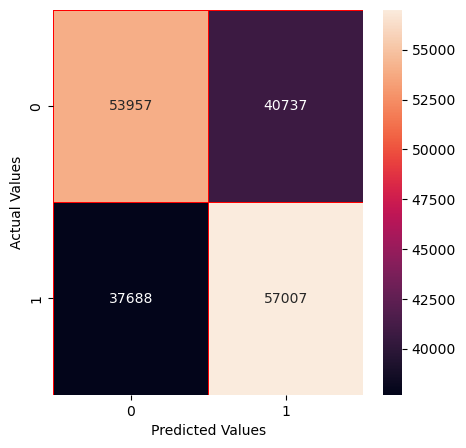

              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58     94694
         1.0       0.58      0.60      0.59     94695

    accuracy                           0.59    189389
   macro avg       0.59      0.59      0.59    189389
weighted avg       0.59      0.59      0.59    189389

Precision: 0.583
Accuracy score: 0.586
Recall score: 0.602
F1 Score: 0.592


In [21]:

# Scale the features using StandardScaler
scaler = StandardScaler()

# logistic regression
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 1, stratify=Y1)


pipe = make_pipeline(scaler, LogisticRegression())
Pipeline(steps=[('standardscaler', StandardScaler()),('logisticregression', LogisticRegression())])

pipe = make_pipeline(StandardScaler(), LogisticRegression())
Pipeline(steps=[('standardscaler', StandardScaler()),('logisticregression', LogisticRegression())])

# fit model
pipe.fit(X1_train, np.ravel(Y1_train, order='C'))

y_pred = pipe.predict(X1_test)
y_test = Y1_test

cm = confusion_matrix(y_test, y_pred)
cm

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor ="red", fmt = ".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#Classification Report
print(classification_report(y_test,y_pred))

#Precision Score
logreg_prec = precision_score(y_test, y_pred,zero_division=0)
print('Precision: %.3f' % logreg_prec)

#Accuracy Score
logreg_acc = accuracy_score(y_test, y_pred)
print('Accuracy score: %.3f' % logreg_acc)

#Recall Score
logreg_rec = recall_score(y_test, y_pred,zero_division=0)
print('Recall score: %.3f' % logreg_rec)

#F1 Score
logreg_f1 = f1_score(y_test, y_pred,zero_division=0)
print('F1 Score: %.3f' % logreg_f1)

In [23]:
# Saving the model for Logistic regression
fileName = 'models/log_model.sav'
pickle.dump(pipe, open(fileName, 'wb'))

### Naive Bayes Model

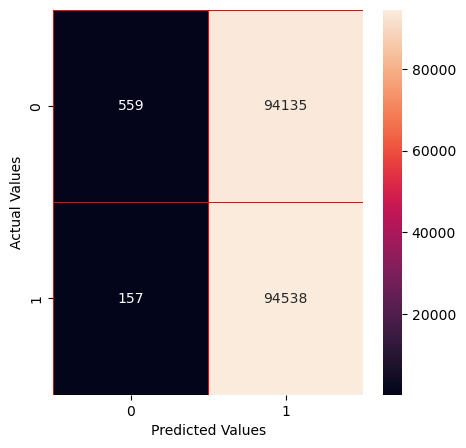

              precision    recall  f1-score   support

         0.0       0.78      0.01      0.01     94694
         1.0       0.50      1.00      0.67     94695

    accuracy                           0.50    189389
   macro avg       0.64      0.50      0.34    189389
weighted avg       0.64      0.50      0.34    189389

Precision: 0.501
Accuracy score: 0.502
Recall score: 0.998
F1 Score: 0.667


In [24]:
# naive bayes
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 1, stratify=Y1)

# instantiate and fit model
gnb = GaussianNB()
nb_model = gnb.fit(X1_train, np.ravel(Y1_train, order='C'))

#Confusion matrix for Naive Bayes
y_pred = nb_model.predict(X1_test)
y_test = Y1_test

cm = confusion_matrix(y_test, y_pred)
cm

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor ="red", fmt = ".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#Classification Report
print(classification_report(y_test,y_pred))

#Precision Score
nb_prec = precision_score(y_test, y_pred,zero_division=0)
print('Precision: %.3f' % nb_prec)

#Accuracy Score
nb_acc = accuracy_score(y_test, y_pred)
print('Accuracy score: %.3f' % nb_acc)

#Recall Score
nb_rec = recall_score(y_test, y_pred,zero_division=0)
print('Recall score: %.3f' % nb_rec)

#F1 Score
nb_f1 = f1_score(y_test, y_pred,zero_division=0)
print('F1 Score: %.3f' % nb_f1)

In [25]:
# Saving the model for Naive Bayes
fileName = 'models/nb_model.sav'
pickle.dump(nb_model, open(fileName, 'wb'))

### KNN Model

#### Looking at different number of neighbors

C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Score')

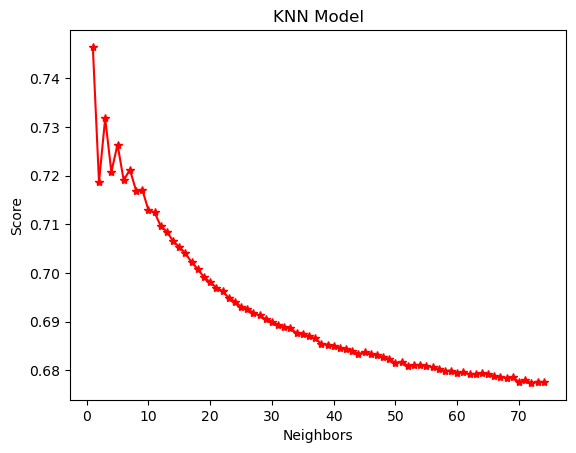

In [27]:
# compare and plot different numbers of neighbors for KNN.
X1_train, X1_test, Y1_train,  Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 1 )

# Scale the features using StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)
neib = []
score = []

# # use SMOTE technique to balance data set
# sm = SMOTE()
# X_train_res, y_train_res = sm.fit_resample(X1_train, np.ravel(Y1_train, order='C'))

for i in range(1,75):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X1_train, np.ravel(Y1_train, order='C'))
    res = neigh.score(X1_test, Y1_test)
    neib.append(i)
    score.append(res)
    
plt.plot(neib, score, '*-r')
plt.title("KNN Model")
plt.xlabel("Neighbors")
plt.ylabel("Score")

C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


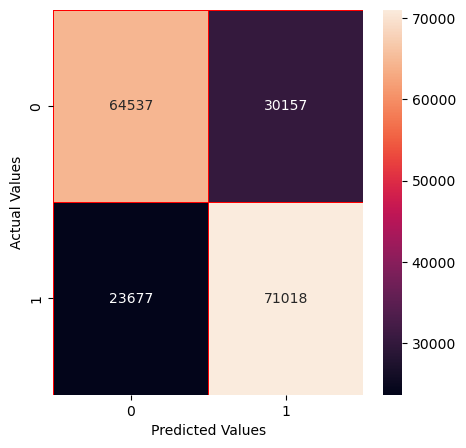

              precision    recall  f1-score   support

         0.0       0.73      0.68      0.71     94694
         1.0       0.70      0.75      0.73     94695

    accuracy                           0.72    189389
   macro avg       0.72      0.72      0.72    189389
weighted avg       0.72      0.72      0.72    189389

Precision: 0.702
Accuracy score: 0.716
Recall score: 0.750
F1 Score: 0.725


In [28]:
#k nearest neighbors
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 1,stratify=Y1 )

# Scale the features using StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X1_train, np.ravel(Y1_train, order='C'))

#Confusion Matrix for KNN

y_pred = knn_model.predict(X1_test)
y_test = Y1_test

cm = confusion_matrix(y_test, y_pred)
cm

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor ="red", fmt = ".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#Classification Report
print(classification_report(y_test,y_pred))

#Precision Score
knn_prec = precision_score(y_test, y_pred,zero_division=0)
print('Precision: %.3f' % knn_prec)

#Accuracy Score
knn_acc = accuracy_score(y_test, y_pred)
print('Accuracy score: %.3f' % knn_acc)

#Recall Score
knn_rec = recall_score(y_test, y_pred,zero_division=0)
print('Recall score: %.3f' % knn_rec)

#F1 Score
knn_f1 = f1_score(y_test, y_pred,zero_division=0)
print('F1 Score: %.3f' % knn_f1)

In [29]:
# Saving the model for KNN with 9 neighbors
fileName = 'models/knn_model.sav'
pickle.dump(knn_model, open(fileName, 'wb'))

#### Feature Extraction for KNN with N = 9

C:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


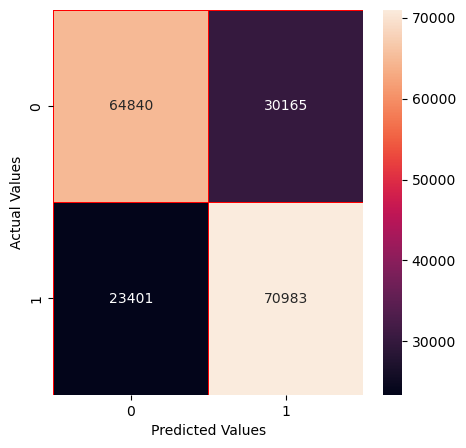

              precision    recall  f1-score   support

         0.0       0.73      0.68      0.71     95005
         1.0       0.70      0.75      0.73     94384

    accuracy                           0.72    189389
   macro avg       0.72      0.72      0.72    189389
weighted avg       0.72      0.72      0.72    189389

Precision: 0.702
Accuracy score: 0.717
Recall score: 0.752
F1 Score: 0.726


In [32]:
# feature extraction
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(X1, np.ravel(Y1, order='C'))
features = fit.transform(X1)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(features, Y1, test_size = 0.2, random_state = 1 )

# Scale the features using StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

knn_model2 = KNeighborsClassifier(n_neighbors=9)
knn_model2.fit(X1_train, np.ravel(Y1_train, order='C'))

#Confusion Matrix for KNN

y_pred = knn_model2.predict(X1_test)
y_test = Y1_test

cm = confusion_matrix(y_test, y_pred)
cm

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor ="red", fmt = ".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#Classification Report
print(classification_report(y_test,y_pred))

#Precision Score
print('Precision: %.3f' % precision_score(y_test, y_pred,zero_division=0))

#Accuracy Score
print('Accuracy score: %.3f' % accuracy_score(y_test, y_pred))

#Recall Score 
print('Recall score: %.3f' % recall_score(y_test, y_pred,zero_division=0))

#F1 Score
print('F1 Score: %.3f' % f1_score(y_test, y_pred,zero_division=0))

In [33]:
# Saving the model for KNN with feature extraction
fileName = 'models/knn_feat_e_model.sav'
pickle.dump(knn_model2, open(fileName, 'wb'))

### Decision Tree Model

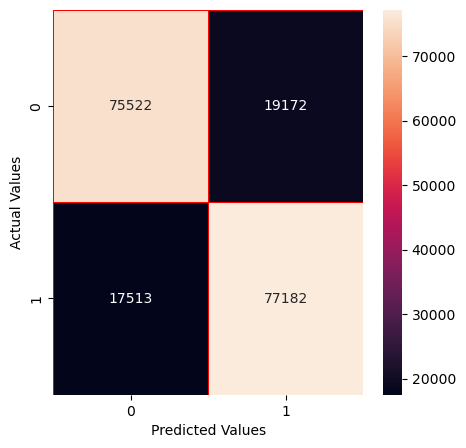

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80     94694
         1.0       0.80      0.82      0.81     94695

    accuracy                           0.81    189389
   macro avg       0.81      0.81      0.81    189389
weighted avg       0.81      0.81      0.81    189389

Precision: 0.801
Accuracy score: 0.806
Recall score: 0.815
F1 Score: 0.808


In [34]:
# Decision tree implementation
from sklearn.tree import DecisionTreeClassifier

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 1, stratify=Y1)

# instantiate and fit model
dcn_model = DecisionTreeClassifier()
dcn_model.fit(X1_train, Y1_train)

#Confusion Matrix for Decision Tree
y_pred = dcn_model.predict(X1_test)
y_test = Y1_test

cm = confusion_matrix(y_test, y_pred)
cm

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor ="red", fmt = ".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#Classification Report
print(classification_report(y_test,y_pred))

#Precision Score
dc_prec = precision_score(y_test, y_pred,zero_division=0)
print('Precision: %.3f' % dc_prec)

#Accuracy Score
dc_acc = accuracy_score(y_test, y_pred)
print('Accuracy score: %.3f' % dc_acc)

#Recall Score
dc_rec = recall_score(y_test, y_pred,zero_division=0)
print('Recall score: %.3f' % dc_rec)

#F1 Score
dc_f1 = f1_score(y_test, y_pred,zero_division=0)
print('F1 Score: %.3f' % dc_f1)

In [35]:
# Saving the model for KNN with 9 neighbors
fileName = 'models/dcn_tree_model.sav'
pickle.dump(dcn_model, open(fileName, 'wb'))

## Looking at each model's metrics

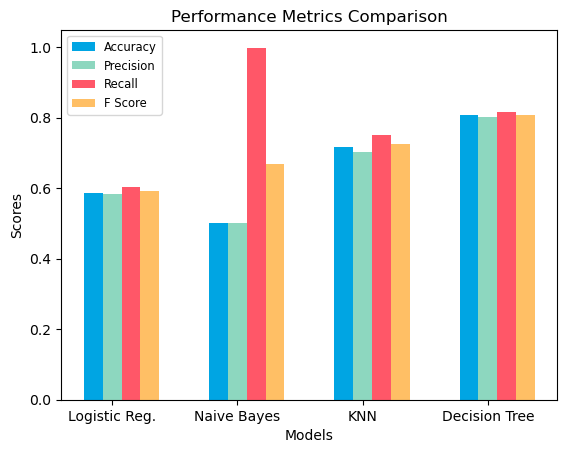

In [40]:
# create accuracy comparison chart
# need to run previous cells for model accuracies

N = 4
ind = np.arange(N) 
width = 0.15
  
accuracies = [logreg_acc, nb_acc, knn_acc, dc_acc]
bar1 = plt.bar(ind, accuracies, width, color = '#00A5E3')
  
precisions = [logreg_prec, nb_prec, knn_prec, dc_prec]
bar2 = plt.bar(ind+width, precisions, width, color='#8DD7BF')
  
recalls = [logreg_rec, nb_rec, knn_rec, dc_rec]
bar3 = plt.bar(ind+width*2, recalls, width, color = '#FF5768')

fscores = [logreg_f1, nb_f1, knn_f1, dc_f1]
bar4 = plt.bar(ind+width*3, fscores, width, color = '#FFBF65')
  
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Performance Metrics Comparison")
  
plt.xticks(ind+width,['Logistic Reg.', 'Naive Bayes', 'KNN', 'Decision Tree'])
plt.legend( (bar1, bar2, bar3, bar4),
           ('Accuracy', 'Precision', 'Recall', 'F Score'),
           loc='upper left',
           bbox_to_anchor=(0, 1), fontsize='small' )
plt.show()

## Conclusion

To create a system that will help bring awareness to the
severity of potential crimes, we utilized different machine
learning techniques with the hope of identifying specific
variables that can aid in predicting whether a potential crime
will be violent. After comparing four classification algorithms
through multiple tests, we observe that the decision tree
classifier and KNN achieve the best accuracy with 0.8 and
0.71 respectively, while maintaining similar precision, recall
and F1 scores to their accuracy scores. We conclude that more
work can be invested into this area to have a more in depth
analysis. There is potential for this system to become a tool for identifying the nature of the crime if it was violent or not.